<a href="https://colab.research.google.com/github/Jannathfatima/my-github/blob/master/Data_Munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4

Topics to cover:-

1. Missing value imputation techniques
2. Outlier treatment techniques
3. Dimensionality reduction
4. Dataset split

We shall start with the imports required to import our dataset and the necessary machine learning libraries.

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We upload the data into our notebook.

In [ ]:
files.upload()

Saving 149550_346098_compressed_income_evaluation.csv.zip to 149550_346098_compressed_income_evaluation.csv.zip


{'149550_346098_compressed_income_evaluation.csv.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x9a\x91TO7|M\xc8\xff\xff\xff\xff\xff\xff\xff\xff\x15\x00\x14\x00income_evaluation.csv\x01\x00\x10\x00U):\x00\x00\x00\x00\x00\xe7,\x07\x00\x00\x00\x00\x00\xbc\xbd[\x8f]7\x92.\xf8~~\x85\x9f\x063\xc0N\x80\xf7\x0b0G\tI%\x97\xdds\xdc\x16J\xae1\xcecZ\xca\xb2\x13-)\x85\x94\xe4\xaa\xfe\xf7\x87\xc1}\x0br1\xc8\xe0ZK\xe5~\xe8*Y\x95Lr\xc5\xe5\x8b\x88/"\xee~\xbf?|\xf7\xcf\xc7\xa7\xffz\xfb\xfe\xee\xf3\xe7\xc3w\xff\xf8\xf8\xfe\x9f\xbf\x7f9|w\xff\xee\xeb\xdb\xbb/\x0f\x8f\x1f\xd1\x7f\xbc\xf9\xf8\xf5\xc3\xe1\xbb\x0fwO\x0f_\xee\xde\xdf|\xfer\xf7\xe5k\xfa_<\xbe}\xfb\xf5\xd3\xe9\xaf>\xdd\xbf\xcf\xff\xe9\xf3\x1f\x0f\x9f\xd2\x7f\xbb{\x9b~\xf8\xe7\xfb\x7f\x1d\xbe{{\xf7)\xff\x8f~\xbf{\xf8x\xfdo\xef\x1f\xe1\xc8?\x1e\xbf>}\xbe\xf9t\xfft\xf3\xcf\xfb\xfb\xff:|\xf71\xfd\x88?\xefo\xde>~\xfd\xf8\xe5\xe9\xbf\x0f\xdf=||\xfb\xf8\xe1\xfe\x7f\xe8x\xf8\xeeM:\xf3\xfe\xe6\xf7\xc7?\x0f\xde[\xe9\x0e\xdf\xbd\xb8{\xfb\xc7\xfd\xfb\xc7\xa7\xcf

The data is unzipped.

In [ ]:
!unzip 149550_346098_compressed_income_evaluation.csv.zip

Archive:  149550_346098_compressed_income_evaluation.csv.zip
  inflating: income_evaluation.csv   


The unzipped csv file is loaded into our dataframe.

In [ ]:
data = pd.read_csv('income_evaluation.csv')

## 1. Missing Value Imputation Techniques

### 1.1. Why are there missing values?

Missing values occur in our dataset when:-

1. While data collection certain parameters were optional.
2. Mistakes are made during data entry.
3. Failure of scripts running while collecting data.

### 1.2. Exploring missing values in our dataframe

We know from our analysis that the dataset doesn't have any actual <b>NaN</b> in the data. Rather, it has the <b>?</b> for missing values.

We print the first 5 rows for the missing values in the <b>Workclass</b> feature.

In [ ]:
data[data[' workclass'] == ' ?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


Similarly we print the first 5 rows of the <b>occupation</b> data having missing values.

In [ ]:
data[data[' occupation'] == ' ?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


And similarly the first 5 rows for the missing values in the feature of <b>Native Country</b> is printed.

In [ ]:
data[data[' native-country'] == ' ?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


We shall replace the <b>' ?'</b> values with <b>NaN</b> values for our inbuilt functions to work on it.

In [ ]:
data = data.replace(to_replace = ' ?', value = np.nan)

After replacing the <b>?</b> with <b>NaN</b> values, we attempt to print any features having <b>?</b>.

In [ ]:
data[data[' workclass'] == ' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


Now that we have successfully replaced all features with <b>?</b> values with <b>NaN</b>, the value of <b>?</b> is nowhere to be seen.

Even the <b>isnull()</b> function is working on the dataset.

In [ ]:
data.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

The heatmap is now showing us all the missing values which were previously not visible.

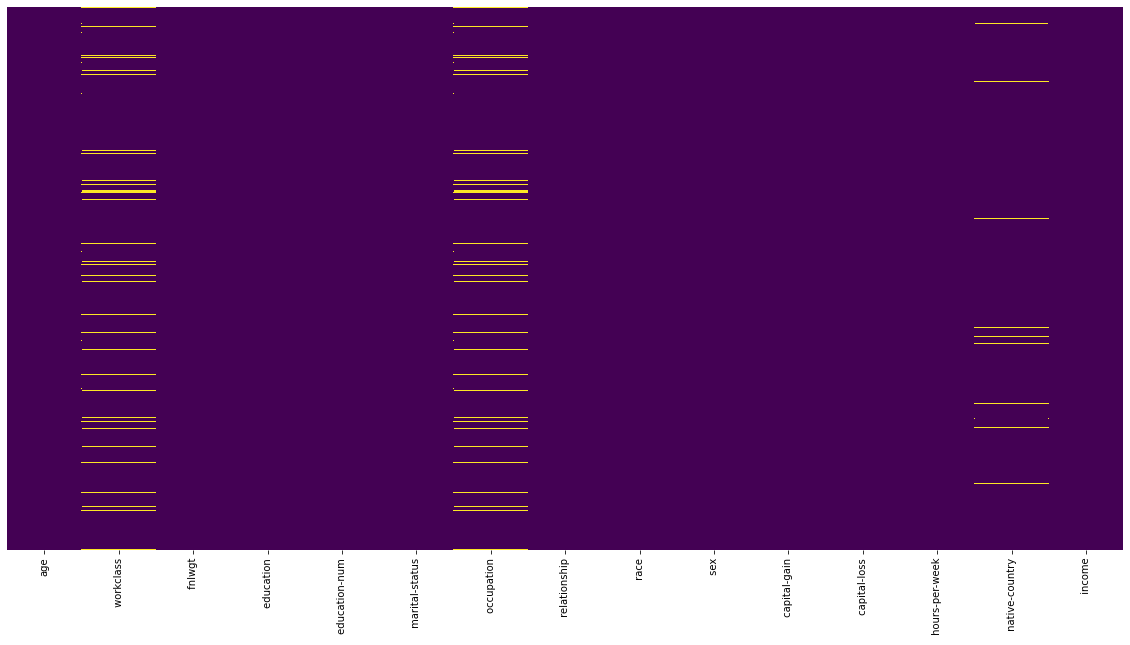

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We attempt to count the occurence of each category in the feature <b>Workclass</b> and are able to see that <b>NaN</b> value and the number of missing values is populating.

In [ ]:
# Counting occurence of each category in the variable
data[' workclass'].value_counts(dropna = False)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
NaN                   1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

We used the parameter <b>dropna = False</b> to allow <b>NaN</b> value counts to get printed.

### 1.3. Handling missing values

The following methods can be employed to impute missing values for Categorical Variables.

1. Deleting the rows.
2. Replacing missing values with random values.
2. Replace missing values using statistical methods.
3. Create a classifier model to impute missing values.
4. Clustering data to impute missing values.

#### 1.3.1. Deleting the rows

---

In [ ]:
# No. of rows in our dataset
data.shape[0]

32561

The <b>shape</b> parameter allows us to view the dimensions of the dataframe.

By default it gives two values seperated by a comma.

The left side value represents the number of rows or <b>instances</b>. The right value side value represents the number of columns or <b>features</b>. 

We can segregate the values using <b>[0]</b> to view only the number of columns and <b>[1]</b> to view the number of features.

I. Dropping missing values by <b>dropna</b> method and using <b>how = 'any'</b> parameter.

In [ ]:
# No. of rows after dropping missing values
data.dropna(how = 'any').shape[0]

30162

The <b>how = 'any'</b> parameter drops all those rows that have a missing value. 

In other words, if any row is missing some value, drop it.

II. Dropping missing values by <b>dropna</b> method and using <b>how = 'all'</b> parameter.

In [ ]:
# No. of rows after dropping missing values
data.dropna(how = 'all').shape[0]

32561

The <b>how = 'all'</b> parameter drops only the rows which have a missing value across all the columns.

III. Using the method <b>subset</b>

In [ ]:
# Create a subset of the columns that we intend to drop missing values from
data.dropna(subset = [' workclass', ' occupation', ' native-country'], how = 'any').shape[0]

30162

Using the <b>subset</b> method we can target the columns having missing values which will get affected by the <b>how = 'any'</b> parameter.



**Condition**:-

<b>DELETING RECORDS MUST ONLY BE DONE IF DATASET IS LARGE ENOUGH.</b>

#### 1.3.2. Replacing missing values with random values

---

I. We can fill any missing value with a random value using the <b>fillna</b> method.

In [ ]:
# A slice of dataframe with missing values
data.loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


In [ ]:
# Result of applying 'fillna' method
data.fillna(0).loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,0,180211,Some-college,10,Married-civ-spouse,0,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


However a vale of '0' for the features <b>workclass</b> and <b>occupation</b> does not make sense.

II. In that case, we can specify how to use the <b>fillna</b> method on each column.

In [ ]:
# Passing a dictionary to impute missing values thorugh 'fillna'
data.fillna({
    ' workclass': 'Some workclass',
    ' occupation': 'Some occupation'
}).loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,Some workclass,180211,Some-college,10,Married-civ-spouse,Some occupation,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


We can observe in the code above that missing values for each feature has been replaced by unique values.

III. We can also use the <b>fill forward</b> method.

This allows us to fill the values from the previous cell to the next cell having missing value.

In [ ]:
data.fillna(method = 'ffill').loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


Notice that the value in the previous cell has been copied in the following cell having missing value.

IV. Similarly, we can use the <b>fill backward</b> method.

In [ ]:
data.fillna(method = 'bfill').loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,Private,180211,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


The value of the cell following the missing value cell has been copied in it.

We can also specify the limiting factor using the parameter <b>limit</b>.

This allows us to limit how far the missing values can be imputed from the previous cell.

1.3.3. Replace missing values using statistical methods. 

Missing values can be replaced using statistical methods such as <b>Mean, Median</b> and <b>Mode</b>.

Remember that <b>Mean</b> and <b>Median</b> is only applicable if we are dealing with missing values in continous variables.

In any case the mean for each feature can be calculated by the method below.

In [ ]:
data.dropna().mean()

age                    38.437902
 fnlwgt            189793.833930
 education-num         10.121312
 capital-gain        1092.007858
 capital-loss          88.372489
 hours-per-week        40.931238
dtype: float64

We can see below that even if we tried to impute the values through <b>mean</b> and <b>median</b>

In [ ]:
data.fillna(data.mean()).loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


In [ ]:
data.fillna(data.dropna().median()).loc[25:28]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K


We may find the <b>mode</b> for the columns using the below.

In [ ]:
data[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

Or the below.

In [ ]:
data.dropna().mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


Following that we can replace missing values in each column.

In [ ]:
data[' workclass'].fillna(data.dropna().mode()[' workclass'][0], inplace = False)[25:29]

25     Local-gov
26       Private
27       Private
28       Private
Name:  workclass, dtype: object

The parameter <b>inplace = False</b> returns a new dataframe. If instead <b>inplace = True</b> is used, the original dataframe is modified. 

#### 1.3.4 Create a classifier model to impute missing values

---

Classifier models can be created to impute missing values.

The classifier should take the features other than the feature having missing values as input. The input features can be mapped to the target variable which in this case would be the feature with missing values.

This is a computationally expensive technique and also takes time.

Since this involves building machine learning models which will be taken on later, we shall just understand the concept in this section.


#### 1.3.5 Clustering data to impute missing values

---

Another technique to impute missing values is to use a clustering model.

This is an unsupervised learning approach where we will create clusters of the data. The number of clusters will depend upon the number categories in the missing column.

## 2. Outlier Treatment Techniques

### 2.1 What are outliers?

Outliers are data points that can be considered to be away from most of the data points.

These are data points that diverges from the overall pattern on a sample set.

Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.

### 2.2 Criteria to identify outlier

1. IQR (Inter Quartile Range)

2. Z - Score

To understand this, let's take a dataset example and try to identify the concept through it.

In [ ]:
data_series = [- 200, -100, -10, -50, 40, 10, 20, 70, 10, 30, 50, 20, 40, 50, 10, 20, 60, 40, 50, 40, 75, 65, 40, 35, 75, 200, 150]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We can view the distribution of the data through a <b>Kernel Density Estimate</b> plot.

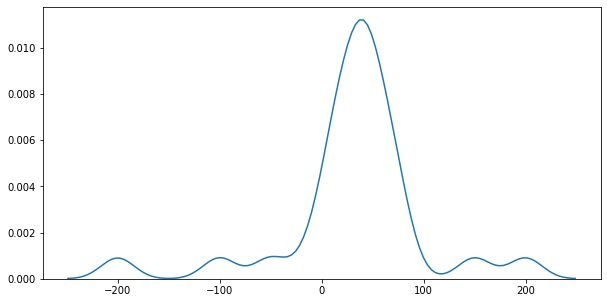

In [ ]:
plt.figure(figsize = (10, 5))
sns.kdeplot(data_series)

Also as discussed before in previous lecture, a boxplot can also be used to identify the outliers in the data.

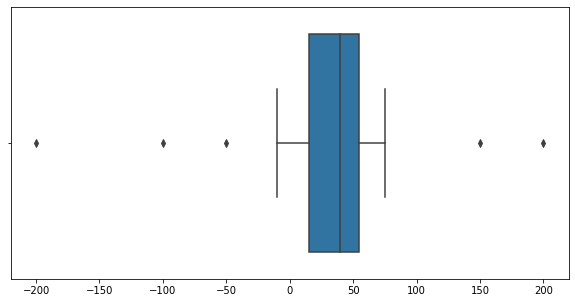

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = data_series)

#### 2.2.1 Inter Quartile Range

---

The steps to follow are below:-

1. Arrange data in increasing order
2. Calculate first quartile (Q1) and third quartile (Q3)
3. Find IQR (Q3 - Q1)
4. Find lower bound
5. Find upper bound

In [ ]:
import numpy as np

In [ ]:
data_series.sort()

In [ ]:
quartile_1, quartile_3 = np.percentile(data_series, [25, 75])

In [ ]:
print(quartile_1, quartile_3)

15.0 55.0


In [ ]:
iqr_value = quartile_3 - quartile_1

In [ ]:
lower_bound_val = quartile_1 - (1.5 * iqr_value)
upper_bound_val = quartile_3 + (1.5 * iqr_value)

In [ ]:
lower_bound_val

-45.0

In [ ]:
upper_bound_val

115.0

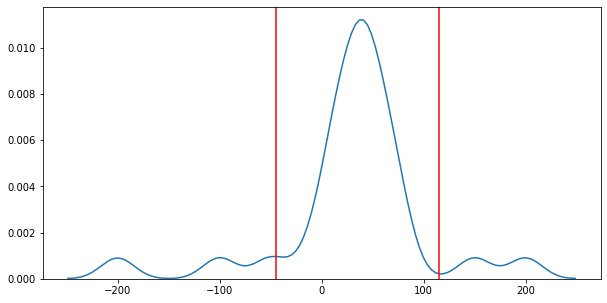

In [ ]:
plt.figure(figsize = (10, 5))
sns.kdeplot(data_series)
plt.axvline(x=-45.0, color = 'red')
plt.axvline(x=115.0, color = 'red')

#### 2.2.2 Z - Score

---

Z - Score is based on the criteria of normal distribution.

Z - Score can be calculated using the formula below.

#$$Z = \frac{X - \mu}{\sigma} $$ </center>

$Z$	= standard score

$X$	= observed value

$\mu$	= 	mean of the sample

$\sigma$	= 	standard deviation of the sample

In [ ]:
z_score = []

In [ ]:
mu = np.mean(data_series)
sigma = np.std(data_series)

for X in data_series:
  diff = np.abs(X - mu)
  z_score.append(diff/sigma)

In [ ]:
z_dict = dict(zip(data_series, z_score))

In [ ]:
z_dict

{-200: 3.3045026110308866,
 -100: 1.874669750488676,
 -50: 1.1597533202175707,
 -10: 0.5878201760006866,
 10: 0.3018536038922444,
 20: 0.15887031783802338,
 30: 0.015887031783802335,
 35: 0.05560461124330819,
 40: 0.1270962542704187,
 50: 0.27007954032463977,
 60: 0.4130628263788608,
 65: 0.4845544694059713,
 70: 0.5560461124330818,
 75: 0.6275377554601923,
 150: 1.6999124008668502,
 200: 2.4148288311379553}

#### 2.2.3. Implementing outlier detection on our dataframe

---

In [ ]:
data_series = pd.Series(data_series)

Using the results we got from IQR, we have the following data.

In [ ]:
data_filtered = data_series[(data_series >= lower_bound_val) & (data_series <= upper_bound_val)]

After applying the lower and upper bound criteria, we have the following result.

In [ ]:
data_filtered

3    -10
4     10
5     10
6     10
7     20
8     20
9     20
10    30
11    35
12    40
13    40
14    40
15    40
16    40
17    50
18    50
19    50
20    60
21    65
22    70
23    75
24    75
dtype: int64

Using the results we got from Z-Scores, we have the following data set.

In [ ]:
data_series[~((data_series-data_series.mean()).abs() > 3*data_series.std())]

1    -100
2     -50
3     -10
4      10
5      10
6      10
7      20
8      20
9      20
10     30
11     35
12     40
13     40
14     40
15     40
16     40
17     50
18     50
19     50
20     60
21     65
22     70
23     75
24     75
25    150
26    200
dtype: int64

In case we have a dataframe with many columns.

Creating another column for the dataframe.

In [ ]:
data_series_2 = [-100, -250, -150, -100, -50, 40, 10, 20, 70, 30, 50, 20, 40, 50, 10, 20, 60, 40, 40, 75, 65, 40, 35, 75, 200, 150, 300]

Creating the dataframe.

In [ ]:
data_frame = pd.DataFrame({'col_1': data_series, 'col_2': data_series_2})

Implementing Z-Score filtering in the dataframe.

In [ ]:
from scipy import stats

data_frame[(np.abs(stats.zscore(data_frame)) < 3).all(axis=1)]

,col_1,col_2
1,-100,-250
2,-50,-150
3,-10,-100
4,10,-50
5,10,40
6,10,10
7,20,20
8,20,70
9,20,30
10,30,50


## Dimensionality Reduction

### 3.1. Components of Dimensionality Reduction

1. Feature Selection

2. Feature Extraction

#### 3.1.1. Feature Selection

---

Feature selection is a method by which we attempt to find a subset of features which are more useful than the others and from which more information can be gained. This is done to prevent the model from overfitting the data.


In essence, we are trying to avoid the problem which is popularly known as the <b>Curse of Dimensionality</b>.

The higher the dimensionality, the harder it is to visualize the data. Many time the features are also highly correlated with each other and hence redundant. Moreover including such features can result in the problem of <b>Multicollinearity</b>.

Using the strategies employed in <b>Exploratory Data Analysis</b>, we can identify these features and select the most important features that have been segregated.

Let's try to implement the same on our dataset.

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We already know through <b>EDA</b> that the features <b>Captial Gain</b>, <b>Capital Loss</b> and <b>Final Weight</b> is not giving us much information.

Therefore, it would we wise to remove these features from our dataset.

In [ ]:
data.drop([' fnlwgt', ' capital-gain', ' capital-loss'], axis = 1).head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


#### 3.1.2 Feature Extraction

---

This is another method to reduce our features from a higher dimensional space to a lower dimensional space.

Typically the methods include the following:-

1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)

##### 3.1.2.1. Principal Component Analysis (PCA)

---

Principal Component Analysis (PCA) is a technique of reducing dimensionality of our dataset while retaining meaningful variation in the data.

This method ensures that the complexity of data is reduced without compromising on the information extracted from data.

One thing to keep in mind is that PCA works on numeircal data.

In [ ]:
data.mean()

age                    38.581647
 fnlwgt            189778.366512
 education-num         10.080679
 capital-gain        1077.648844
 capital-loss          87.303830
 hours-per-week        40.437456
dtype: float64

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data[['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])

In [ ]:
data_transformed = pd.DataFrame(data_transformed, columns = ['PCA1', 'PCA2'])

In [ ]:
data_concat = pd.concat([data, data_transformed], axis = 1)

In [ ]:
data_concat

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,PCA1,PCA2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,-112262.329664,1099.917217
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,-106467.395741,-1074.257811
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,25867.604154,-1078.283620
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,44942.603983,-1078.862077
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,148630.604092,-1082.021027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,67523.604211,-1079.553082
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-35404.395788,-1076.418594
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-37868.395963,-1076.341022
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11711.604374,-1077.857717


Similarly there's an intresting method called <b>CATPCA</b> which means, Categorical Principal Component Analysis.

https://www.ibm.com/support/knowledgecenter/en/SSLVMB_23.0.0/spss/categories/idh_cpca.html

Another method which we can use to perform dimensionality reduction on categorical variables using PCA is to do the following:-

1. Perform OHE(One-Hot-Encoding) on the categorical data
2. Implement PCA on the same

This method ensures that you don't suffer from the <b>Curse of Dimensionality</b> and also are able to deal with categorical variables.

It would be recommended to go through the link below.

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

##### 3.1.2.2. LinearLinear Discriminant Analysis (LDA)

---

The concept of LDA is similar to that of PCA but instead of focusing on the variability of the data, we focus on maximizing the seperatibility.

Again this method is applicable to numerical data.

Here, we seperate the continous and ordinal data that is numerical in nature.

In [ ]:
data_X = data[['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']]
data_y = data[[' income']]

We import LDA from sklearn library and apply it to the data.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(data_X, data_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Based on LDA, we get a new feature that combines all of the important aspects of the numerical data.

In [ ]:
data_lda

array([[ 0.69335766],
       [ 0.13977106],
       [-0.41354993],
       ...,
       [ 0.23805382],
       [-1.57060476],
       [ 0.9018695 ]])

Now as we added the new features or principal components in the dataset above, we can do the same here.

## Dataset Split

The data can be typically split into train and test set.

### 4.1 Train Split

This refers to a split of data used to fit the model.

This can be set to 70% of the data.

### 4.2 Test Split

The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

This is usually 30% of the data.

### 4.3 Implementing Train-Test Split

To implement the split, we can use the <b>train_test_split</b> function in Scikit learn.

In [ ]:
from sklearn.model_selection import train_test_split

We shall assign the target variable from the training data to a separate variable.

In [ ]:
y = data[' income']

Subsequently, we shall drop the target variable in the data to have only the training features.

In [ ]:
X = data.drop([' income'], axis = 1)

We shall now implement the <b>train_test_split</b> function to split the data.

We can assign the test size to the percent of data instances to be placed in the test set by the <b>test_size</b> parameter.

The value in <b>random_state</b> as it suggests, randomizes the data to have an arbitrary selection of rows in our train and test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

The sizes of each dataframe can be observed using the shape parameter.

In [ ]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (22792, 14)
X test shape:  (9769, 14)
y train shape:  (22792,)
y test shape:  (9769,)


Since the <b>y</b> dataframes are acting like vectors, the no. of columns in returned by shape is not present.

# References

1. https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/

2. https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html

3. https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/

4. https://www.geeksforgeeks.org/dimensionality-reduction/

5. https://towardsdatascience.com/comprehending-principal-component-analysis-9e820094ed44

6. https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

7. https://www.ibm.com/support/knowledgecenter/en/SSLVMB_23.0.0/spss/categories/idh_cpca.html

8. https://machinelearningmastery.com/difference-test-validation-datasets/